In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# try load a data and show it
names = ['name', 'sex', 'count']
test_data = pd.read_csv('./names/yob1880.txt', header=None, names=names, index_col=False)
test_data

,name,sex,count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
year = range(1880, 2018)
df = []
for y in year:
    data_name = './names/yob{}.txt'.format(y)
    buffer = pd.read_csv(data_name, header=None, names=names, index_col=False)
    buffer['year'] = y  # add year columns
    df.append(buffer)
df = pd.concat(df, ignore_index=True)
df

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [6]:
total_births = df.pivot_table('count', index='year', columns='sex', aggfunc=sum)
def add_prop(group):
    group['prop'] = group['count'] / group['count'].sum()
    return group
df = df.groupby(['year', 'sex']).apply(add_prop)
df

,name,sex,count,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [7]:
#TODO: show the trend of 'Allen' over time
ALLEN = df[df.name == 'Howard']
M_ALLEN = ALLEN[ALLEN.sex == 'M']
F_ALLEN = ALLEN[ALLEN.sex == 'F']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1259c5780>],
      dtype=object)

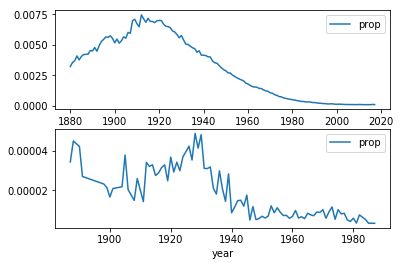

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1)
M_ALLEN.plot(
    x='year', y='prop', subplots=True, ax=axes[0])
F_ALLEN.plot(
    x='year', y='prop', subplots=True, ax=axes[1])

In [13]:
#TODO: rank names over time, to find top 10 names for each year
def get_top_nums(group, nums=10):
    return group.sort_values(by='prop', ascending=False)[:nums]

top_names = df.groupby(['year', 'sex']).apply(get_top_nums)
top_names

name sex  count  year      prop
year sex                                              
1880 F   0             Mary   F   7065  1880  0.077643
         1             Anna   F   2604  1880  0.028618
         2             Emma   F   2003  1880  0.022013
         3        Elizabeth   F   1939  1880  0.021309
         4           Minnie   F   1746  1880  0.019188
         5         Margaret   F   1578  1880  0.017342
         6              Ida   F   1472  1880  0.016177
         7            Alice   F   1414  1880  0.015540
         8           Bertha   F   1320  1880  0.014507
         9            Sarah   F   1288  1880  0.014155
     M   942           John   M   9655  1880  0.087383
         943        William   M   9532  1880  0.086269
         944          James   M   5927  1880  0.053642
         945        Charles   M   5348  1880  0.048402
         946         George   M   5126  1880  0.046393
         947          Frank   M   3242  1880  0.029342
         948         Joseph   M   2632  1880  0.023821
         949         Thomas   M   2534  1880  0.022934
         950          Henry   M   2444  1880  0.022119
         951         Robert   M   2415  1880  0.021857
1881 F   2000          Mary   F   6919  1881  0.075245
         2001          Anna   F   2698  1881  0.029341
         2002          Emma   F   2034  1881  0.022120
         2003     Elizabeth   F   1852  1881  0.020141
         2004      Margaret   F   1658  1881  0.018031
         2005        Minnie   F   1653  1881  0.017977
         2006           Ida   F   1439  1881  0.015649
         2007         Annie   F   1326  1881  0.014420
         2008        Bertha   F   1324  1881  0.014399
         2009         Alice   F   1308  1881  0.014225
...                     ...  ..    ...   ...       ...
2016 M   1878034       Noah   M  19082  2016  0.010101
         1878035       Liam   M  18198  2016  0.009633
         1878036    William   M  15739  2016  0.008332
         1878037      Mason   M  15230  2016  0.008062
         1878038      James   M  14842  2016  0.007857
         1878039   Benjamin   M  14629  2016  0.007744
         1878040      Jacob   M  14479  2016  0.007665
         1878041    Michael   M  14057  2016  0.007441
         1878042     Elijah   M  13867  2016  0.007341
         1878043      Ethan   M  13806  2016  0.007308
2017 F   1892196       Emma   F  19738  2017  0.011530
         1892197     Olivia   F  18632  2017  0.010884
         1892198        Ava   F  15902  2017  0.009290
         1892199   Isabella   F  15100  2017  0.008821
         1892200     Sophia   F  14831  2017  0.008664
         1892201        Mia   F  13437  2017  0.007850
         1892202  Charlotte   F  12893  2017  0.007532
         1892203     Amelia   F  11800  2017  0.006893
         1892204     Evelyn   F  10675  2017  0.006236
         1892205    Abigail   F  10551  2017  0.006164
     M   1910505       Liam   M  18728  2017  0.010209
         1910506       Noah   M  18326  2017  0.009990
         1910507    William   M  14904  2017  0.008124
         1910508      James   M  14232  2017  0.007758
         1910509      Logan   M  13974  2017  0.007617
         1910510   Benjamin   M  13733  2017  0.007486
         1910511      Mason   M  13502  2017  0.007360
         1910512     Elijah   M  13268  2017  0.007233
         1910513     Oliver   M  13141  2017  0.007163
         1910514      Jacob   M  13106  2017  0.007144

[2760 rows x 5 columns]

In [18]:
def give_top_names(year=1880, sex='F'):
    return top_names[top_names['year'] == year][top_names['sex'] == sex].name.values
# We can simply check ten names in certain year by typing:
give_top_names(year=2000, sex='F')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['Emily', 'Hannah', 'Madison', 'Ashley', 'Sarah', 'Alexis',
       'Samantha', 'Jessica', 'Elizabeth', 'Taylor'], dtype=object)